In [1]:
from keras.datasets import  cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


In [2]:
# Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Determine datasets characteristics
print("Training Images: {}".format(X_train.shape))
print("Testing Images: {}".format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


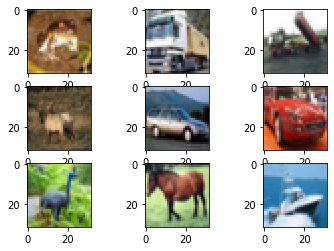

In [5]:
# Create a grid of 3 * 3 images
for i in range(0,9):
    plt.subplot(330 + i + 1)
    img = X_train[i]
    plt.imshow(img)
    
# Show the plot
plt.show()

In [6]:
# Preprocessing the datasets

# Fix the random seed for reproducibility
seed = 6
np.random.seed(seed)

# Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [7]:
# Normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0 
X_test = X_test / 255.0

In [8]:
# Class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [9]:
# Hot encode the outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_class = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Table 1: The three base networks used for classification on CIFAR-10 and CIFAR-100.

Model - C

* Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU
* global averaging over 6 × 6 spatial dimensions
* 10 or 100-way softmax

In [10]:
# Start by importing necessary packages

from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD


In [17]:
# Start by importing necessary packages

from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

# Define the model function

def allcnn(weights = None):
    
    # Define model type
    model = Sequential()
    
    # add model layers
    model.add(Conv2D(96, (3,3), padding = 'same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3,3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1,1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1,1), padding = 'valid'))
    
    # Add global average pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation("softmax"))
    
    # Load the weights
    if weights:
        model.load_weights(weights)
        
    # Return model
    return model

In [22]:
# Define the hyperparameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model and define the weights
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr = learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Print model summary
print(model.summary())

# Define additional trainig parameters
# epochs = 350
# batch_size = 32

# Fit the model
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose = 1)


# Test the model with pre-defined weights
scores = model.evaluate(X_test, y_test, verbose = 1)
print('Accuracy: {}'.format(scores[1]))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 192)      

In [23]:
# making a dictionary of class label and names
classes = range(0,10)

names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']

# make a dictionary of class labels
class_labels = dict(zip(classes,names))

print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [37]:
# Generate a batch of 9 images to predict
batch = X_test[200:209]
labels = np.argmax(y_test[100:109], axis = -1)

# Make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 4ms/step


In [38]:
# Print the predictions
print(predictions)

[[1.21151917e-15 1.06740902e-16 1.42194511e-11 3.57045678e-07
  8.18856857e-11 9.99999642e-01 4.77344889e-13 1.19800491e-12
  2.26929365e-16 2.06219875e-13]
 [6.42618772e-07 9.99756873e-01 8.07895591e-12 2.06031251e-11
  1.13838724e-12 2.38498349e-13 9.10406733e-13 1.57557075e-11
  1.69890235e-08 2.42484093e-04]
 [3.62066880e-16 1.69333353e-15 1.61788876e-28 7.13772826e-27
  2.73483531e-26 1.14785147e-26 1.14458903e-27 7.17662170e-23
  1.00000000e+00 5.21232030e-20]
 [7.17008484e-13 1.59409668e-16 3.21783079e-16 6.96208230e-11
  9.31436794e-09 8.77934497e-07 1.15529915e-14 9.99999166e-01
  4.72987270e-20 2.03012635e-16]
 [2.63879242e-23 1.00000000e+00 3.53264490e-30 1.98867012e-29
  3.49750202e-29 4.32107962e-29 1.46089079e-17 1.09631058e-28
  2.98740580e-24 3.76282156e-14]
 [1.37090151e-21 3.62406897e-23 1.64339236e-20 1.00000000e+00
  1.23841498e-16 2.60288129e-08 6.20972396e-19 1.80733622e-15
  4.34719709e-24 2.06650924e-22]
 [9.89781260e-01 6.42512129e-12 5.44723150e-07 1.55292958e

In [39]:
# These are class properties which should sum to 1
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [40]:
# Use the np.argmax() to convert class probability to class labels
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[5 1 8 7 1 3 0 5 7]


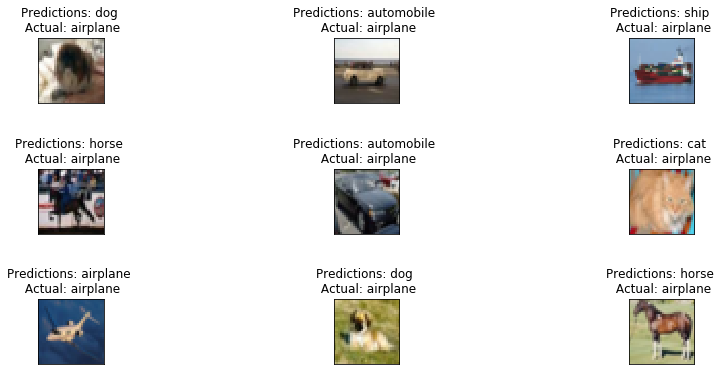

In [41]:
# Create a grid of 3 * 3 images
fig, axs = plt.subplots(3,3, figsize = (15,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    
    # Determine labels for each predictions
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = "Predictions: {} \n Actual: {}".format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
        
    # Plot the image
    axs[i].imshow(img)

# show plot
plt.show()

In [ ]:
# For predicting other things use the cnn weights and fine tune weights as per your class labels.